In [ ]:
# Instructions :
# Using the Mental Health dataset and what you have learn this week, answer the following questions :

# What is the distribution of mental health conditions among different age groups in the tech industry?
# How does the frequency of mental health issues vary by gender?
# Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.


In [93]:
import pandas as pd


df=pd.read_csv('survey.csv')



In [94]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [96]:
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame(
    {
        'Missing Count': missing_counts,
        'Missing %': missing_pct
    }
)

missing_df[missing_df['Missing Count'] > 0]


,Missing Count,Missing %
state,515,40.905481
self_employed,18,1.429706
work_interfere,264,20.969023
comments,1095,86.973789


In [97]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [98]:
df = df.drop(columns=["comments"])

df = df.dropna(subset=["self_employed"])

In [99]:
df['work_interfere']=df['work_interfere'].fillna(df['work_interfere'].mode()[0])  # Categories

In [100]:
df['state'] = df['state'].fillna(df['Country'].where(df['Country'] != 'United States', 'Unknown_US_state'))

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 18 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1241 non-null   object
 1   Age                        1241 non-null   int64 
 2   Gender                     1241 non-null   object
 3   Country                    1241 non-null   object
 4   state                      1241 non-null   object
 5   self_employed              1241 non-null   object
 6   family_history             1241 non-null   object
 7   treatment                  1241 non-null   object
 8   work_interfere             1241 non-null   object
 9   no_employees               1241 non-null   object
 10  remote_work                1241 non-null   object
 11  tech_company               1241 non-null   object
 12  benefits                   1241 non-null   object
 13  care_options               1241 non-null   object
 14  wellness_pro

In [102]:
# ============================================
# RUN THIS CELL FIRST - All imports for today
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

# Set default figure size
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries loaded! Ready for visualization.")

All libraries loaded! Ready for visualization.


In [103]:
bins = [15, 24, 34, 44, 54, 64, 100]
labels = ['15–24', '25–34', '35–44', '45–54', '55–64', '65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


BinTreat = {'No': 0, 'Yes': 1}

df['BinTreat'] = df['treatment'].map(BinTreat)


In [59]:
age_treatment_counts = pd.crosstab(df['AgeGroup'], df['treatment'])
age_treatment_counts


treatment,No,Yes
AgeGroup,,
15–24,85,69
25–34,356,342
35–44,142,171
45–54,22,29
55–64,4,11
65+,1,1


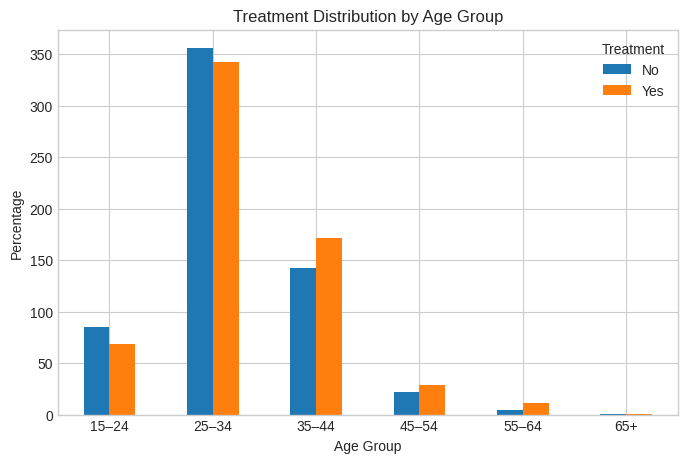

In [104]:
import matplotlib.pyplot as plt

age_treatment_counts.plot(kind='bar', figsize=(8,5))
plt.title('Treatment Distribution by Age Group')
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.show()


In [105]:
def clean_gender(g):

    if 'male' in g or g in ['m', 'man', 'cis male', 'cis man']:
        return 'Male'

    elif 'female' in g or g in ['f', 'woman', 'cis female', 'cis-female/femme']:
        return 'Female'

    else:
        return 'Other'

df['Gender_clean'] = df['Gender'].apply(clean_gender)


In [110]:
gender_rate = df.groupby('Gender_clean')['BinTreat'].mean() * 100
gender_rate


,BinTreat
Gender_clean,
Female,62.500000
Male,55.710956
Other,47.613065


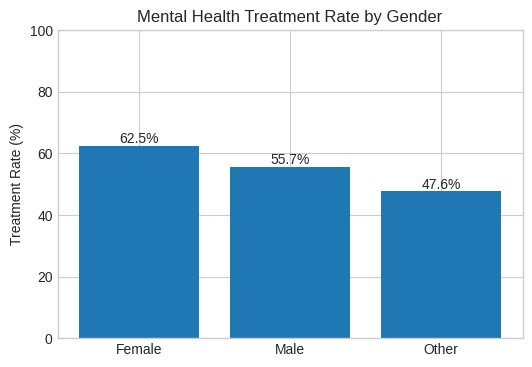

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

bars = plt.bar(gender_rate.index, gender_rate.values)

plt.title('Mental Health Treatment Rate by Gender')
plt.ylabel('Treatment Rate (%)')
plt.ylim(0, 100)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 1,
             f'{height:.1f}%',
             ha='center')

plt.show()


In [112]:
country_rates = df.groupby('Country')['BinTreat'].mean() * 100


country_rates.sort_values(ascending=False).head(10)



country_rates.sort_values().head(10)


,BinTreat
Country,
Austria,0.0
Bosnia and Herzegovina,0.0
Colombia,0.0
China,0.0
Czech Republic,0.0
Costa Rica,0.0
Greece,0.0
Georgia,0.0
Israel,0.0


In [113]:
country_counts = df['Country'].value_counts()

# keep only countries with at least 20 responses
valid_countries = country_counts[country_counts >= 20].index

country_rates_filtered = df[df['Country'].isin(valid_countries)] \
    .groupby('Country')['BinTreat'].mean() * 100

country_rates_filtered.sort_values(ascending=False).head(10)


,BinTreat
Country,
Australia,61.904762
United States,54.459459
Canada,54.411765
United Kingdom,49.726776
Ireland,48.148148
Germany,46.666667
Netherlands,33.333333


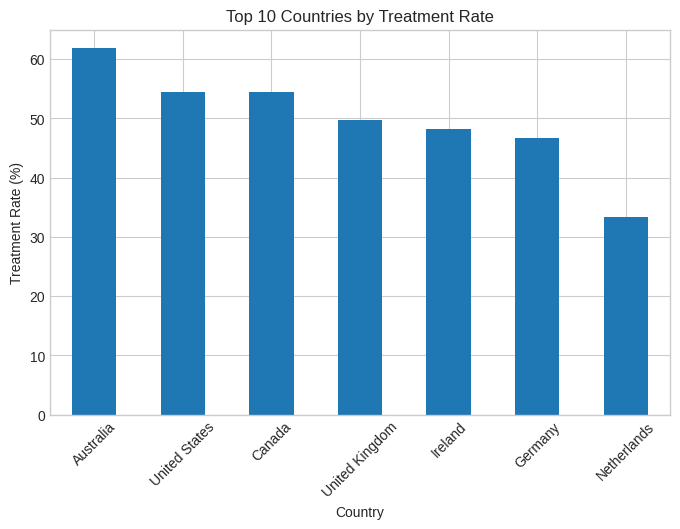

In [114]:
top10 = country_rates_filtered.sort_values(ascending=False).head(10)

top10.plot(kind='bar', figsize=(8,5))
plt.title('Top 10 Countries by Treatment Rate')
plt.ylabel('Treatment Rate (%)')
plt.xticks(rotation=45)
plt.show()
